In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from sklearn import tree, svm, datasets, metrics
from sklearn.model_selection import train_test_split,StratifiedKFold, ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV, learning_curve
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from utilities import plot_2d_data, plot_2d_classifier, plot_confusionmatrix
from utilities import learning_curve_model, validation_curve_model, plot_learning_curve
from scipy import stats
import seaborn as sns
import os
import timeit

from utilities import get_colors
cm = get_colors(colormap='RdBu', n_colors=2)

In [2]:
data = pd.read_csv("./data/adult.csv")
data.shape

(32561, 15)

In [3]:
data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
def ringCategorization(ring):
    if ring < 9: return '1'
    if 9 <= ring < 15: return '2'
    if 15 <= ring < 21: return '3'
    else: return '4'

In [4]:
data = data.apply(LabelEncoder().fit_transform)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,0,2649,11,8,6,0,1,4,0,0,91,39,39,0
1,65,4,6514,11,8,6,4,1,4,0,0,91,17,39,0
2,49,0,11175,15,9,6,0,4,2,0,0,91,39,39,0
3,37,4,7009,5,3,0,7,4,4,0,0,90,39,39,0
4,24,4,16850,15,9,5,10,3,4,0,0,90,39,39,0


In [5]:
data_X = data.drop(columns = ['income'], axis=1)/256
data_y = data['income']
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=100)

In [6]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

In [7]:
dtc = tree.DecisionTreeClassifier(random_state=100)
dtc.fit(train_X, train_y)

DecisionTreeClassifier(random_state=100)

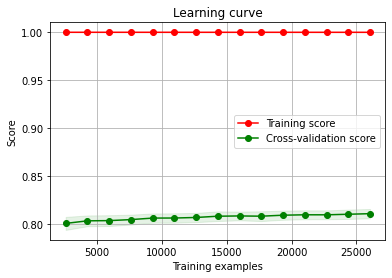

In [8]:
train_size=np.linspace(.1, 1.0, 15)
learning_curve_model(data_X, data_y, dtc, cv, train_size)
plt.show()

In [9]:
predict_y_train = dtc.predict(train_X)
predict_y = dtc.predict(test_X)
print(f"Training accuracy score: {100* accuracy_score(train_y, predict_y_train)}%")
print(f"Testing accuracy Score: {100* accuracy_score(test_y, predict_y)}%")

Training accuracy score: 99.99616093366093%
Testing accuracy Score: 81.02257024412714%


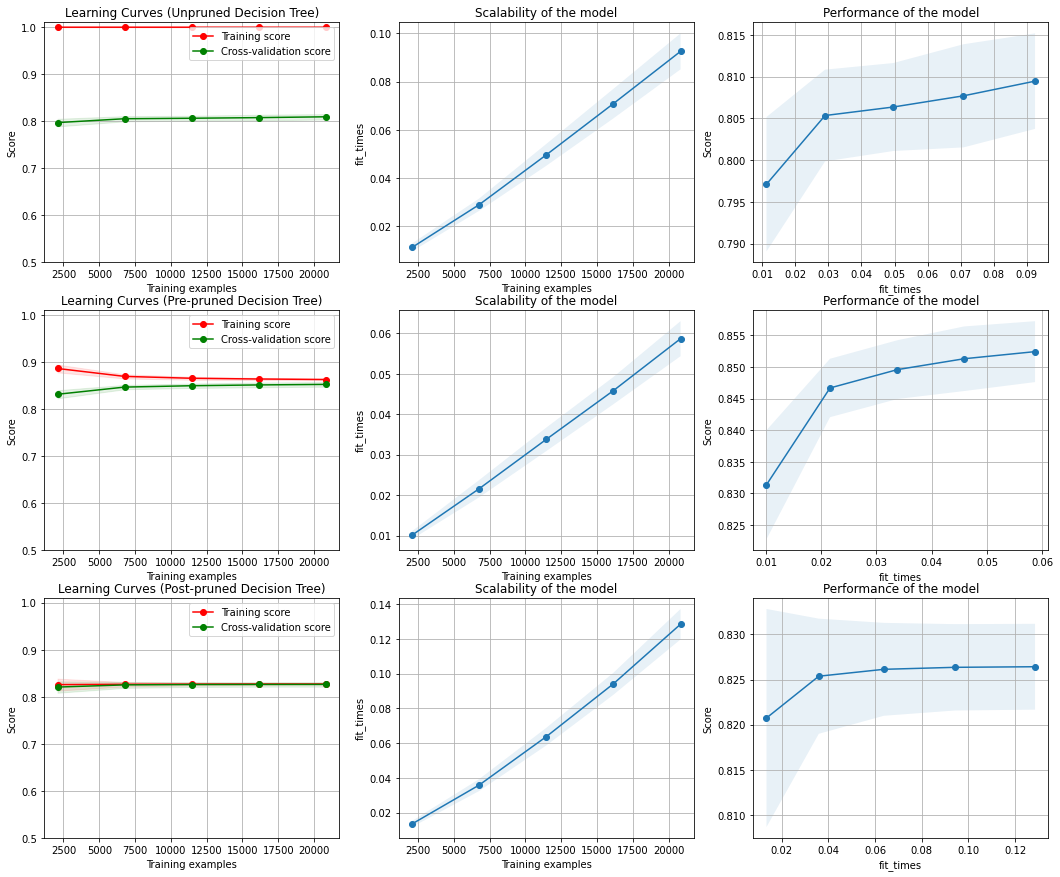

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

title = "Learning Curves (Unpruned Decision Tree)"
dtc = tree.DecisionTreeClassifier(random_state=100)
plot_learning_curve(dtc, title, train_X, train_y, axes=axes[0, :], ylim=(0.5, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Pre-pruned Decision Tree)"
dtc_pre = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=3, random_state=100)
plot_learning_curve(dtc_pre, title, train_X, train_y, axes=axes[1,:], ylim=(0.5, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Post-pruned Decision Tree)"
dtc_post = tree.DecisionTreeClassifier(ccp_alpha=0.018, random_state=100)
plot_learning_curve(dtc_post, title, train_X, train_y, axes=axes[2,:], ylim=(0.5, 1.01), cv=cv, n_jobs=4)


plt.show()

### Neural Network

In [11]:
#fig, axes = plt.subplots(3, 1, figsize=(15, 15))

#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

#title = "Learning Curves (5 layer MLP)"
#clf1 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,), solver='sgd', max_iter=10000, random_state=18)
#clf1.fit(train_X, train_y)
#plt.subplot(clf1.loss_curve_)
#plot_learning_curve(clf1, title, train_X, train_y, axes=axes[0, :], ylim=(0.7, 1.01), cv=cv, n_jobs=4)

#title = "Learning Curves (10 layer MLP)"
#clf2 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(10,), solver='sgd', max_iter=10000, random_state=18)
#clf2.fit(train_X, train_y)
#plt.subplot(clf2.loss_curve_)
# plot_learning_curve(clf2, title, train_X, train_y, axes=axes[1,:], ylim=(0.7, 1.01),cv=cv, n_jobs=4)

#title = "Learning Curves (15 layer MLP)"
#clf3 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(15,), solver='sgd', max_iter=10000, random_state=18)
#clf3.fit(train_X, train_y)
#plt.subplot(clf3.loss_curve_)
# plot_learning_curve(clf3, title, train_X, train_y, axes=axes[2,:], ylim=(0.7, 1.01), cv=cv, n_jobs=4)


#plt.show()

In [12]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(14,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [13]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
train2_X, val_X, train2_y, val_y = train_test_split(train_X, train_y, test_size=0.2, random_state=100)

hist = model.fit(train2_X, train2_y,
          batch_size=32, epochs=150,
          validation_data=(val_X, val_y))


Epoch 1/150
652/652 [==============================] - 1s 982us/step - loss: 0.5916 - accuracy: 0.7528 - val_loss: 0.5769 - val_accuracy: 0.7601
Epoch 2/150
652/652 [==============================] - 1s 777us/step - loss: 0.5566 - accuracy: 0.7601 - val_loss: 0.5782 - val_accuracy: 0.7601
Epoch 3/150
652/652 [==============================] - 1s 770us/step - loss: 0.5524 - accuracy: 0.7601 - val_loss: 0.5522 - val_accuracy: 0.7601
Epoch 4/150
652/652 [==============================] - 0s 750us/step - loss: 0.5513 - accuracy: 0.7601 - val_loss: 0.5508 - val_accuracy: 0.7601
Epoch 5/150
652/652 [==============================] - 1s 768us/step - loss: 0.5507 - accuracy: 0.7601 - val_loss: 0.5541 - val_accuracy: 0.7601
Epoch 6/150
652/652 [==============================] - 1s 770us/step - loss: 0.5509 - accuracy: 0.7601 - val_loss: 0.5509 - val_accuracy: 0.7601
Epoch 7/150
652/652 [==============================] - 1s 783us/step - loss: 0.5508 - accuracy: 0.7601 - val_loss: 0.5499 - val_ac

652/652 [==============================] - 0s 712us/step - loss: 0.5408 - accuracy: 0.7601 - val_loss: 0.7003 - val_accuracy: 0.5083
Epoch 58/150
652/652 [==============================] - 0s 751us/step - loss: 0.5425 - accuracy: 0.7592 - val_loss: 0.5443 - val_accuracy: 0.7601
Epoch 59/150
652/652 [==============================] - 0s 742us/step - loss: 0.5409 - accuracy: 0.7598 - val_loss: 0.5434 - val_accuracy: 0.7601
Epoch 60/150
652/652 [==============================] - 0s 733us/step - loss: 0.5409 - accuracy: 0.7587 - val_loss: 0.5535 - val_accuracy: 0.7601
Epoch 61/150
652/652 [==============================] - 0s 691us/step - loss: 0.5412 - accuracy: 0.7587 - val_loss: 0.5495 - val_accuracy: 0.7601
Epoch 62/150
652/652 [==============================] - 0s 718us/step - loss: 0.5393 - accuracy: 0.7591 - val_loss: 0.5372 - val_accuracy: 0.7601
Epoch 63/150
652/652 [==============================] - 0s 699us/step - loss: 0.5409 - accuracy: 0.7594 - val_loss: 0.5620 - val_accuracy

652/652 [==============================] - 1s 845us/step - loss: 0.5311 - accuracy: 0.7689 - val_loss: 0.5415 - val_accuracy: 0.7660
Epoch 114/150
652/652 [==============================] - 1s 849us/step - loss: 0.5355 - accuracy: 0.7669 - val_loss: 1.4594 - val_accuracy: 0.2800
Epoch 115/150
652/652 [==============================] - 0s 736us/step - loss: 0.5336 - accuracy: 0.7672 - val_loss: 0.5453 - val_accuracy: 0.7639
Epoch 116/150
652/652 [==============================] - 0s 726us/step - loss: 0.5315 - accuracy: 0.7707 - val_loss: 0.5456 - val_accuracy: 0.7635
Epoch 117/150
652/652 [==============================] - 0s 738us/step - loss: 0.5339 - accuracy: 0.7678 - val_loss: 0.5285 - val_accuracy: 0.7704
Epoch 118/150
652/652 [==============================] - 0s 731us/step - loss: 0.5355 - accuracy: 0.7644 - val_loss: 0.5417 - val_accuracy: 0.7645
Epoch 119/150
652/652 [==============================] - 0s 747us/step - loss: 0.5334 - accuracy: 0.7664 - val_loss: 0.5420 - val_ac

In [15]:
model.evaluate(test_X, test_y)[1]

204/204 [==============================] - 0s 511us/step - loss: 0.5551 - accuracy: 0.7582


0.7581759691238403

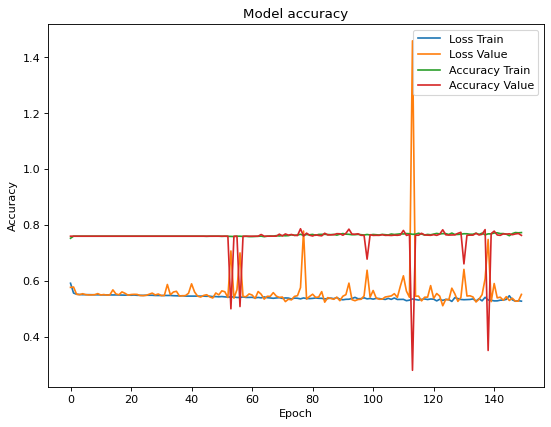

In [16]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss Train', 'Loss Value', 'Accuracy Train', 'Accuracy Value'], loc='best')
plt.show()

### Boosting

In [17]:
n_learning_rate_steps, n_folds = 10, 10
learninn_learning_rate_steps, n_folds = 10, 10
learning_rates = np.linspace(0.1, 1.0, num=n_learning_rate_steps)
splitter = StratifiedKFold(n_splits=n_folds, shuffle=True)
trn_err = np.zeros((n_learning_rate_steps, n_folds))
val_err = np.zeros((n_learning_rate_steps, n_folds))
stump = DecisionTreeClassifier(max_depth=1, random_state = 100)
 
for i, rate in enumerate(learning_rates):
    for j, (trn, val) in enumerate(splitter.split(train_X, train_y)):
        model = AdaBoostClassifier(algorithm='SAMME', base_estimator=stump, 
                                   n_estimators=10, learning_rate=rate)
        model.fit(train_X.values[trn, :], train_y.values[trn])
        trn_err[i, j] = 1 - accuracy_score(train_y.values[trn], model.predict(train_X.values[trn, :]))
        val_err[i, j] = 1 - accuracy_score(train_y.values[val], model.predict(train_X.values[val, :]))
trn_err = np.mean(trn_err, axis=1)
val_err = np.mean(val_err, axis=1)
print(f'Training Error {trn_err}, Value Error {val_err}')


Training Error [0.23986486 0.20780866 0.19876989 0.19669679 0.16486657 0.16463623
 0.16601828 0.1679293  0.16466608 0.16492629], Value Error [0.23986485 0.20780842 0.20001451 0.19663612 0.16531039 0.16454275
 0.16619269 0.16792093 0.16469579 0.16511844]


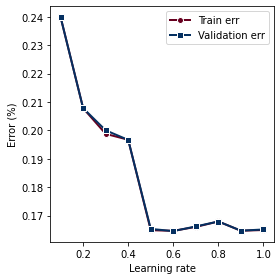

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

ax.plot(learning_rates, trn_err, marker='o', c=cm[0], markeredgecolor='w', linewidth=2)
ax.plot(learning_rates, val_err, marker='s', c=cm[1], markeredgecolor='w', linewidth=2)
ax.legend(['Train err', 'Validation err'])
ax.set_xlabel('Learning rate')
ax.set_ylabel('Error (%)')

fig.tight_layout()

In [19]:
n_learning_rate_steps, n_folds = 10, 10
learning_rates = np.linspace(0.1, 1.0, num=n_learning_rate_steps)
splitter = StratifiedKFold(n_splits=n_folds, shuffle=True)
trn_err = np.zeros((n_learning_rate_steps, n_folds))
val_err = np.zeros((n_learning_rate_steps, n_folds))
stump = DecisionTreeClassifier(max_depth=1, random_state = 100)

In [20]:
n_estimator_steps, n_folds = 2, 10
number_of_stumps = np.arange(2, 40, n_estimator_steps)
splitter = StratifiedKFold(n_splits=n_folds, shuffle=True)

trn_err = np.zeros((len(number_of_stumps), n_folds))
val_err = np.zeros((len(number_of_stumps), n_folds))

stump = DecisionTreeClassifier(max_depth=1)
for i, n_stumps in enumerate(number_of_stumps):
    for j, (trn, val) in enumerate(splitter.split(train_X, train_y)):
        model = AdaBoostClassifier(algorithm='SAMME', base_estimator=stump,
                                   n_estimators=n_stumps, learning_rate=0.9)
        model.fit(train_X.values[trn, :], train_y.values[trn])

        trn_err[i, j] = 1 - accuracy_score(train_y.values[trn], 
                                           model.predict(train_X.values[trn, :]))
        val_err[i, j] = 1 - accuracy_score(train_y.values[val], 
                                           model.predict(train_X.values[val, :]))

trn_err = np.mean(trn_err, axis=1)
val_err = np.mean(val_err, axis=1)

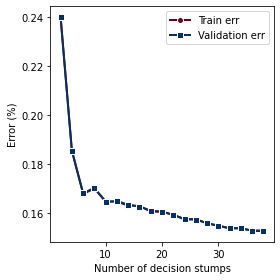

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

ax.plot(number_of_stumps, trn_err, marker='o', c=cm[0], markeredgecolor='w', linewidth=2)
ax.plot(number_of_stumps, val_err, marker='s', c=cm[1], markeredgecolor='w', linewidth=2)
ax.legend(['Train err', 'Validation err'])
ax.set_xlabel('Number of decision stumps')
ax.set_ylabel('Error (%)')

fig.tight_layout()

In [22]:
shallow_tree = DecisionTreeClassifier(max_depth=1)
ensemble = AdaBoostClassifier(base_estimator=shallow_tree, 
                                  n_estimators=32, learning_rate=0.6)
ensemble.fit(train_X, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.6, n_estimators=32)

In [23]:
ypred = ensemble.predict(test_X)
acc = accuracy_score(test_y, ypred)
acc

0.8552126516198373

### SVM

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

title = "Learning Curves (C5 layer MLP)"
clf1 = model = svm.SVC(kernel='poly', C=15, gamma='auto')
clf1.fit(train_X, train_y)
plot_learning_curve(clf1, title, train_X, train_y, axes=axes[0, :], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C30 layer MLP)"
clf2 = model = svm.SVC(kernel='poly', C=30, gamma='auto')
clf2.fit(train_X, train_y)
plot_learning_curve(clf2, title, train_X, train_y, axes=axes[1,:], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C45 layer MLP)"
clf3 = model = svm.SVC(kernel='poly', C=45, gamma='auto')
clf3.fit(train_X, train_y)
plot_learning_curve(clf3, title, train_X, train_y, axes=axes[2,:], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)


plt.show()

In [ ]:
print(f'Best Score - C5: {clf1.score(test_X, test_y)*100:.2f}%')
print(f'Best Score - C30: {clf2.score(test_X, test_y)*100:.2f}%')
print(f'Best Score - C45: {clf3.score(test_X, test_y)*100:.2f}%')

### KNN

In [ ]:
# try to find best k value
scoreList = []
for i in range(2,40,2):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(train_X, train_y)
    fpr, tpr, thresholds = metrics.roc_curve(test_y, knn2.predict_proba(test_X)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(test_y,knn2.predict(test_X))
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (f'# Nodes: {i}', auc))
    scoreList.append(knn2.score(test_X, test_y))
    # Custom settings for the plot 

In [ ]:
plt.plot(range(2,40,2), scoreList)
plt.xticks(np.arange(2,40,2))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


In [ ]:
acc = max(scoreList)*100
print(f'Maximum KNN Accuracy is {acc:.2f}%')